# IMF Economic Indicators: China vs India

In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",palette="muted")

In [163]:
df_weo_2 = pd.read_csv('WEO_2.csv') 

In [164]:
df_weo_2.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1980,1981,1982,1983,1984,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ABW,Aruba,346,Gross national savings (% of GDP),% of GDP,NaN,NaN,NaN,NaN,NaN,...,1.546600e+01,1.722100e+01,1.704400e+01,1.820300e+01,1.987200e+01,1.922800e+01,1.848700e+01,1.765400e+01,1.682600e+01,1.580800e+01
1,ABW,Aruba,347,"Inflation, average consumer prices",Index,NaN,NaN,NaN,NaN,NaN,...,1.183540e+02,1.173030e+02,1.167280e+02,1.207960e+02,1.224600e+02,1.247890e+02,1.273760e+02,1.300910e+02,1.328960e+02,1.357690e+02
2,ABW,Aruba,352,Population (WEO),Value,NaN,NaN,NaN,NaN,NaN,...,1.090000e+05,1.100000e+05,1.110000e+05,1.110000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.130000e+05,1.130000e+05,1.130000e+05
3,ABW,Aruba,354,General government total expenditure,National Currency,NaN,NaN,NaN,NaN,NaN,...,1.346000e+09,1.342000e+09,1.359000e+09,1.431000e+09,1.424000e+09,1.448000e+09,1.490000e+09,1.531000e+09,1.572000e+09,1.614000e+09
4,ABW,Aruba,355,General government net lending/borrowing,National Currency,NaN,NaN,NaN,NaN,NaN,...,-7.800000e+07,-7.800000e+07,-1.430000e+08,-9.800000e+07,-4.300000e+07,-3.000000e+07,-2.600000e+07,-1.800000e+07,-9.000000e+06,2.000000e+06


Data is 'wide' shaped

Change the values in the Indicator column to be strings

In [165]:
df_weo_2['Indicator'] = df_weo_2['Indicator'].astype(str)

## Extract India and China from DataFrame

New dataframes created for each country.

In [166]:
df_india = df_weo_2[df_weo_2['Country Name']=='India'] 
df_china = df_weo_2[df_weo_2['Country Name']=='China']

Drop unneeded columns.

In [167]:
df_india = df_india.drop(columns=['Country ISO3', 'Indicator Id'])
df_china = df_china.drop(columns=['Country ISO3', 'Indicator Id'])

In [168]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1416 to 1433
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       18 non-null     object 
 1   Indicator          18 non-null     object 
 2   Subindicator Type  18 non-null     object 
 3   1980               8 non-null      float64
 4   1981               8 non-null      float64
 5   1982               8 non-null      float64
 6   1983               8 non-null      float64
 7   1984               8 non-null      float64
 8   1985               8 non-null      float64
 9   1986               8 non-null      float64
 10  1987               8 non-null      float64
 11  1988               12 non-null     float64
 12  1989               14 non-null     float64
 13  1990               14 non-null     float64
 14  1991               16 non-null     float64
 15  1992               16 non-null     float64
 16  1993               16 n

In [169]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 583 to 601
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       19 non-null     object 
 1   Indicator          19 non-null     object 
 2   Subindicator Type  19 non-null     object 
 3   1980               6 non-null      float64
 4   1981               7 non-null      float64
 5   1982               11 non-null     float64
 6   1983               11 non-null     float64
 7   1984               11 non-null     float64
 8   1985               11 non-null     float64
 9   1986               11 non-null     float64
 10  1987               11 non-null     float64
 11  1988               11 non-null     float64
 12  1989               13 non-null     float64
 13  1990               13 non-null     float64
 14  1991               13 non-null     float64
 15  1992               13 non-null     float64
 16  1993               13 non

## First eyeballing of the data - there seem to be one fewer row in the China dataframe

There are more rows with NA values at the beginning of the time period for India and China. What this implies is that not all indicators were measured at the beginning of the period.

However there is one fewer total rows in the India data frame. What is missing?

In [170]:
list_india = (df_india['Indicator'].tolist())
list_china = (df_china['Indicator'].tolist())
list_china

['Total investment (% of GDP)',
 'Gross national savings (% of GDP)',
 'Inflation, average consumer prices',
 'Population (WEO)',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',
 'General government gross debt',
 'Gross domestic product corresponding to fiscal year',
 'Volume of imports (% change)',
 'Volume of exports (% change)',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',
 'General government gross debt',
 'Inflation, average consumer prices',
 'Unemployment rate (% of total labor force) (WEO)']

In [171]:
for i in list_china:
    print (i in list_india)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False


So indicator data for 'Unemployment rate (% of total labor force) (WEO)' is not included in the raw data for India.

It is also apparant the some entries are duplicates. INvestigating this, it turns out that they are simply the indicator, but measured by dfferent means

## To avoid confusion down the line, let's add 'Subindicator Type' to the end of 'Indicator'
Extract as string and add to Indicator column

In [172]:
df_india['Indicator'] =  df_india['Indicator'] + ' ' + '(' + df_india['Subindicator Type'].astype(str) +')'
df_china['Indicator'] =  df_china['Indicator'] + ' ' + '(' + df_china['Subindicator Type'].astype(str) +')'

In [173]:
df_india['Indicator']

1416               Total investment (% of GDP) (% of GDP)
1417         Gross national savings (% of GDP) (% of GDP)
1418           Inflation, average consumer prices (Index)
1419                             Population (WEO) (Value)
1420    General government total expenditure (National...
1421    General government net lending/borrowing (Nati...
1422    General government structural balance (Nationa...
1423    General government primary net lending/borrowi...
1424    General government gross debt (National Currency)
1425    Gross domestic product corresponding to fiscal...
1426        Volume of imports (% change) (Percent change)
1427        Volume of exports (% change) (Percent change)
1428      General government total expenditure (% of GDP)
1429    General government net lending/borrowing (% of...
1430     General government structural balance (% of GDP)
1431    General government primary net lending/borrowi...
1432             General government gross debt (% of GDP)
1433    Inflat

## Remove all Indicators that are measured in national currency 

In [174]:
df_india = df_india.loc[df_india['Subindicator Type'] != 'National Currency']
df_china = df_china.loc[df_china['Subindicator Type'] != 'National Currency']

## Create Baseline: Group together G20 countries

To add a baseline for the comparison of the two contries we will add mean values for G20 group of countries.

In [175]:
#List of countries in the G20 group

g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy',\
       'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', \
           'United States', 'the European Union']

In [176]:
df_g20 = df_weo_2[df_weo_2['Country Name'].isin(g20)]
df_g20['Indicator'] =  df_g20['Indicator'] + ' ' + '(' + df_g20['Subindicator Type'].astype(str) +')'
df_g20.head()

<ipython-input-176-5efd5b611ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g20['Indicator'] =  df_g20['Indicator'] + ' ' + '(' + df_g20['Subindicator Type'].astype(str) +')'


,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1980,1981,1982,1983,1984,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
83,ARG,Argentina,345,Total investment (% of GDP) (% of GDP),% of GDP,2.098500e+01,1.876900e+01,1.817200e+01,1.732500e+01,1.644100e+01,...,1.707100e+01,1.905300e+01,1.875700e+01,2.077400e+01,1.696900e+01,1.507400e+01,1.519200e+01,1.512100e+01,1.493800e+01,1.454700e+01
84,ARG,Argentina,346,Gross national savings (% of GDP) (% of GDP),% of GDP,2.140100e+01,1.878900e+01,1.789000e+01,1.749300e+01,1.681800e+01,...,1.432800e+01,1.634000e+01,1.384300e+01,1.542000e+01,1.499300e+01,1.258700e+01,1.267100e+01,1.263800e+01,1.246600e+01,1.205800e+01
85,ARG,Argentina,347,"Inflation, average consumer prices (Index)",Index,NaN,NaN,NaN,NaN,NaN,...,NaN,1.682700e+02,2.114730e+02,2.839590e+02,4.080240e+02,5.027270e+02,5.953840e+02,6.713260e+02,7.266470e+02,7.686050e+02
86,ARG,Argentina,352,Population (WEO) (Value),Value,2.795000e+07,2.845000e+07,2.893000e+07,2.934000e+07,2.984000e+07,...,4.313200e+07,4.359000e+07,4.407200e+07,4.456000e+07,4.505200e+07,4.555100e+07,4.605400e+07,4.656400e+07,4.707800e+07,4.759900e+07
87,ARG,Argentina,354,General government total expenditure (National...,National Currency,NaN,NaN,NaN,NaN,NaN,...,2.463140e+12,3.411230e+12,4.382860e+12,5.680580e+12,7.560650e+12,9.363400e+12,1.128204e+13,1.303617e+13,1.436253e+13,1.550474e+13


Remove indicators that are measured in national currency

In [177]:
df_g20 = df_g20.loc[df_g20['Subindicator Type'] != 'National Currency']

In [178]:
#create groupby: indicator. extract G20 mean values

df_g20_gb = df_g20.groupby(['Indicator']).mean().reset_index()
df_g20_gb['Country Name'] = 'G20 mean'
df_g20_gb = df_g20_gb.drop(columns=['Indicator Id'])
df_g20_gb

,Indicator,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Country Name
0,General government gross debt (% of GDP),3.926725e+01,4.179075e+01,4.486050e+01,4.776600e+01,4.973700e+01,5.183075e+01,5.448875e+01,5.514650e+01,6.142440e+01,...,7.540059e+01,7.599441e+01,7.844141e+01,7.847541e+01,7.803841e+01,7.794553e+01,7.781418e+01,7.775047e+01,7.776706e+01,G20 mean
1,General government net debt (% of GDP),2.429867e+01,2.599567e+01,2.924267e+01,2.764225e+01,2.984025e+01,3.336375e+01,3.558050e+01,3.390075e+01,4.241560e+01,...,5.611236e+01,5.642164e+01,5.764607e+01,5.885521e+01,5.939200e+01,6.010779e+01,6.081921e+01,6.123236e+01,6.158029e+01,G20 mean
2,General government net lending/borrowing (% of...,-2.953000e+00,-3.252750e+00,-3.139400e+00,-3.490000e+00,-3.285800e+00,-2.940000e+00,-2.907200e+00,-2.089400e+00,-3.020250e+00,...,-4.339882e+00,-3.514765e+00,-3.166765e+00,-3.478529e+00,-3.098941e+00,-3.137059e+00,-3.043529e+00,-2.940824e+00,-2.849529e+00,G20 mean
3,General government primary net lending/borrowi...,-1.605750e+00,-1.993250e+00,-2.481500e+00,-2.527750e+00,-1.948750e+00,-1.580250e+00,-1.010250e+00,1.215000e-01,4.560000e-02,...,-2.443294e+00,-1.504941e+00,-1.088353e+00,-1.351824e+00,-9.126471e-01,-8.575882e-01,-7.434118e-01,-6.411176e-01,-5.400000e-01,G20 mean
4,General government structural balance (% of GDP),-2.158000e+00,-5.527000e+00,-2.640000e+00,-3.506333e+00,-3.986000e+00,-4.368333e+00,-3.744333e+00,-3.055333e+00,-5.211750e+00,...,-3.397687e+00,-3.207625e+00,-2.983500e+00,-2.892187e+00,-2.697562e+00,-2.722187e+00,-2.710062e+00,-2.660500e+00,-2.586375e+00,G20 mean
5,General government total expenditure (% of GDP),3.946575e+01,4.112300e+01,3.882500e+01,3.899840e+01,3.878220e+01,3.851680e+01,3.802400e+01,3.693100e+01,3.516112e+01,...,3.707906e+01,3.631947e+01,3.651341e+01,3.676018e+01,3.651494e+01,3.632782e+01,3.621929e+01,3.607529e+01,3.598241e+01,G20 mean
6,Gross national savings (% of GDP) (% of GDP),2.465965e+01,2.367476e+01,2.135406e+01,2.007071e+01,2.058512e+01,2.073076e+01,2.026947e+01,2.140965e+01,2.266376e+01,...,2.328941e+01,2.376871e+01,2.383529e+01,2.343718e+01,2.318118e+01,2.306788e+01,2.298312e+01,2.288465e+01,2.283553e+01,G20 mean
7,"Inflation, average consumer prices (Index)",3.395350e+01,4.118900e+01,5.265231e+01,7.936025e+01,1.644824e+02,4.535147e+02,1.065000e+03,3.407389e+03,2.458745e+04,...,1.816618e+12,1.879225e+12,1.948092e+12,2.017508e+12,2.099605e+12,2.183593e+12,2.270247e+12,2.360319e+12,2.454006e+12,G20 mean
8,"Inflation, average consumer prices (Percent ch...",2.494127e+01,1.881350e+01,1.872369e+01,2.256656e+01,2.352188e+01,2.506100e+01,2.077125e+01,2.922050e+01,5.579275e+01,...,2.679563e+00,4.280059e+00,5.319882e+00,5.547941e+00,4.548294e+00,4.207235e+00,3.880824e+00,3.627471e+00,3.441294e+00,G20 mean
9,Population (WEO) (Value),1.615613e+08,1.640546e+08,1.667141e+08,1.692231e+08,1.717572e+08,1.743946e+08,1.771619e+08,1.800343e+08,1.829017e+08,...,2.507626e+08,2.529327e+08,2.549934e+08,2.570352e+08,2.590283e+08,2.609949e+08,2.629378e+08,2.646958e+08,2.664630e+08,G20 mean


## 2016 - 2019 change in Indicator values

New columns created.

In [179]:
df_india['5 Year % growth'] = (df_india['2019']-df_india['2014'])/df_india['2014']*100
df_china['5 Year % growth'] = (df_china['2019']-df_china['2014'])/df_china['2014']*100
df_g20_gb['5 Year % growth'] = (df_g20_gb['2019']-df_g20_gb['2014'])/df_g20_gb['2014']*100

In [180]:
df_china

,Country Name,Indicator,Subindicator Type,1980,1981,1982,1983,1984,1985,1986,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,5 Year % growth
583,China,Total investment (% of GDP) (% of GDP),% of GDP,3.547600e+01,3.354400e+01,3.242800e+01,3.238100e+01,3.485200e+01,3.953600e+01,3.820900e+01,...,4.414200e+01,4.464300e+01,4.422200e+01,4.303400e+01,4.228100e+01,4.175900e+01,4.123300e+01,4.061800e+01,3.999800e+01,-7.997862
584,China,Gross national savings (% of GDP) (% of GDP),% of GDP,3.238300e+01,3.181400e+01,3.483300e+01,3.489000e+01,3.485200e+01,3.398000e+01,3.525200e+01,...,4.594400e+01,4.601000e+01,4.458800e+01,4.345400e+01,4.254500e+01,4.188000e+01,4.119700e+01,4.051100e+01,3.980800e+01,-11.345506
585,China,"Inflation, average consumer prices (Index)",Index,1.777600e+01,1.822000e+01,1.858400e+01,1.895600e+01,1.946800e+01,2.127900e+01,2.266200e+01,...,1.020030e+02,1.035920e+02,1.057670e+02,1.081760e+02,1.108880e+02,1.139920e+02,1.172980e+02,1.208170e+02,1.244420e+02,9.734226
586,China,Population (WEO) (Value),Value,9.870500e+08,1.000720e+09,1.016540e+09,1.030080e+09,1.043570e+09,1.058510e+09,1.075070e+09,...,1.382710e+09,1.390080e+09,1.395380e+09,1.400170e+09,1.404440e+09,1.408170e+09,1.411330e+09,1.411180e+09,1.411020e+09,2.365077
593,China,Volume of imports (% change) (Percent change),Percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.708000e+00,7.125000e+00,7.931000e+00,4.141000e+00,4.830000e+00,4.562000e+00,4.347000e+00,4.105000e+00,3.452000e+00,-46.664091
594,China,Volume of exports (% change) (Percent change),Percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.077000e+00,9.100000e+00,4.009000e+00,3.300000e+00,4.100000e+00,3.600000e+00,3.300000e+00,3.100000e+00,2.900000e+00,-22.389464
595,China,General government total expenditure (% of GDP),% of GDP,NaN,NaN,2.409800e+01,2.451400e+01,2.327400e+01,2.232100e+01,2.216600e+01,...,3.193200e+01,3.217900e+01,3.399400e+01,3.476200e+01,3.451900e+01,3.405500e+01,3.382600e+01,3.346800e+01,3.314100e+01,20.013810
596,China,General government net lending/borrowing (% of...,% of GDP,NaN,NaN,2.190000e-01,-9.000000e-03,6.900000e-02,9.180000e-01,-3.430000e-01,...,-3.704000e+00,-3.900000e+00,-4.807000e+00,-6.063000e+00,-5.483000e+00,-5.397000e+00,-5.417000e+00,-5.325000e+00,-5.257000e+00,567.731278
597,China,General government structural balance (% of GDP),% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.571000e+00,-3.937000e+00,-4.835000e+00,-6.118000e+00,-5.506000e+00,-5.420000e+00,-5.403000e+00,-5.293000e+00,-5.206000e+00,1210.064240
598,China,General government primary net lending/borrowi...,% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.946000e+00,-2.970000e+00,-3.769000e+00,-4.947000e+00,-4.301000e+00,-4.146000e+00,-4.103000e+00,-3.958000e+00,-3.843000e+00,1297.457627


In [181]:
df_india.head()

,Country Name,Indicator,Subindicator Type,1980,1981,1982,1983,1984,1985,1986,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,5 Year % growth
1416,India,Total investment (% of GDP) (% of GDP),% of GDP,1.916900e+01,1.894300e+01,1.908100e+01,1.823200e+01,1.912600e+01,2.060200e+01,2.008000e+01,...,3.021200e+01,3.094100e+01,3.158600e+01,3.174400e+01,3.181400e+01,3.198900e+01,3.203200e+01,3.212500e+01,3.228000e+01,-7.365472
1417,India,Gross national savings (% of GDP) (% of GDP),% of GDP,1.587400e+01,1.589800e+01,1.599100e+01,1.546100e+01,1.662600e+01,1.856900e+01,1.827900e+01,...,2.958600e+01,2.910600e+01,2.906700e+01,2.926900e+01,2.942300e+01,2.955800e+01,2.955100e+01,2.964500e+01,2.979300e+01,-11.182254
1418,India,"Inflation, average consumer prices (Index)",Index,8.960000e+00,1.009400e+01,1.087500e+01,1.224100e+01,1.303800e+01,1.385300e+01,1.508500e+01,...,1.382780e+02,1.432590e+02,1.482450e+02,1.539990e+02,1.605370e+02,1.673320e+02,1.743220e+02,1.814450e+02,1.886890e+02,22.083842
1419,India,Population (WEO) (Value),Value,6.855000e+08,7.000000e+08,7.155000e+08,7.310000e+08,7.470000e+08,7.630000e+08,7.795000e+08,...,1.299800e+09,1.316900e+09,1.334220e+09,1.351770e+09,1.369560e+09,1.387580e+09,1.405830e+09,1.424330e+09,1.443060e+09,6.752958
1426,India,Volume of imports (% change) (Percent change),Percent change,1.335500e+01,1.033800e+01,7.437000e+00,4.566000e+00,9.400000e-02,7.484000e+00,3.415000e+00,...,4.027000e+00,1.380300e+01,9.582000e+00,9.949000e+00,8.728000e+00,8.730000e+00,8.634000e+00,8.904000e+00,8.908000e+00,82.684539


Plot out results.

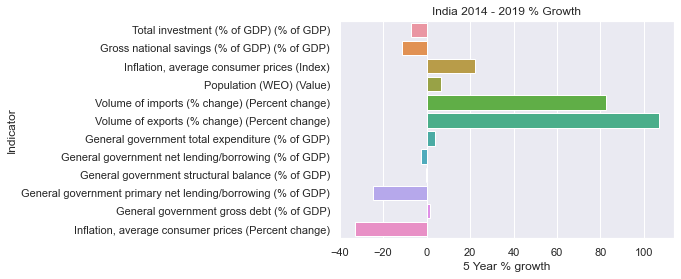

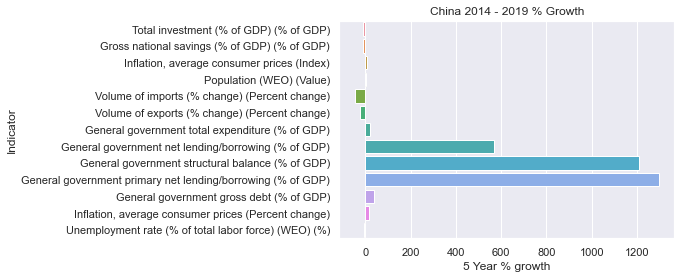

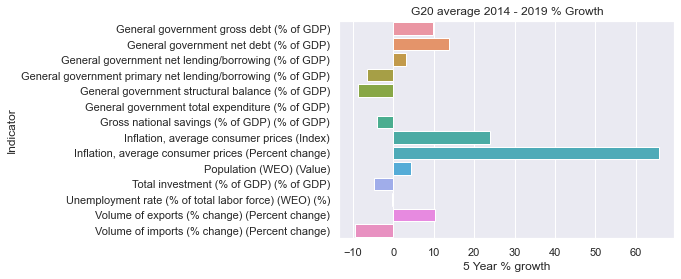

In [182]:
#plot barplot
fig, ax = plt.subplots()

ax = sns.barplot(y=df_india['Indicator'], x=df_india['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('India 2014 - 2019 % Growth')
plt.show()
ax = sns.barplot(y=df_china['Indicator'], x=df_china['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('China 2014 - 2019 % Growth')
plt.show()
ax = sns.barplot(y=df_g20_gb['Indicator'], x=df_g20_gb['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('G20 average 2014 - 2019 % Growth')
plt.show()

There are some interesting observations here. None of India, China or G20 show similar growth characteristics 

## Side-by-side comparison 
Combine China, India, G20 into large DataFrame

In [183]:
df_merged = pd.merge(df_india, df_china, how='outer') # merge India and China
df_merged_g20 = pd.merge(df_merged, df_g20_gb, how='outer') # merge new dataframe with G20

In [184]:
df_merged_g20

,Country Name,Indicator,Subindicator Type,1980,1981,1982,1983,1984,1985,1986,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,5 Year % growth
0,India,Total investment (% of GDP) (% of GDP),% of GDP,1.916900e+01,1.894300e+01,1.908100e+01,1.823200e+01,1.912600e+01,2.060200e+01,2.008000e+01,...,3.021200e+01,3.094100e+01,3.158600e+01,3.174400e+01,3.181400e+01,3.198900e+01,3.203200e+01,3.212500e+01,3.228000e+01,-7.365472
1,India,Gross national savings (% of GDP) (% of GDP),% of GDP,1.587400e+01,1.589800e+01,1.599100e+01,1.546100e+01,1.662600e+01,1.856900e+01,1.827900e+01,...,2.958600e+01,2.910600e+01,2.906700e+01,2.926900e+01,2.942300e+01,2.955800e+01,2.955100e+01,2.964500e+01,2.979300e+01,-11.182254
2,India,"Inflation, average consumer prices (Index)",Index,8.960000e+00,1.009400e+01,1.087500e+01,1.224100e+01,1.303800e+01,1.385300e+01,1.508500e+01,...,1.382780e+02,1.432590e+02,1.482450e+02,1.539990e+02,1.605370e+02,1.673320e+02,1.743220e+02,1.814450e+02,1.886890e+02,22.083842
3,India,Population (WEO) (Value),Value,6.855000e+08,7.000000e+08,7.155000e+08,7.310000e+08,7.470000e+08,7.630000e+08,7.795000e+08,...,1.299800e+09,1.316900e+09,1.334220e+09,1.351770e+09,1.369560e+09,1.387580e+09,1.405830e+09,1.424330e+09,1.443060e+09,6.752958
4,India,Volume of imports (% change) (Percent change),Percent change,1.335500e+01,1.033800e+01,7.437000e+00,4.566000e+00,9.400000e-02,7.484000e+00,3.415000e+00,...,4.027000e+00,1.380300e+01,9.582000e+00,9.949000e+00,8.728000e+00,8.730000e+00,8.634000e+00,8.904000e+00,8.908000e+00,82.684539
5,India,Volume of exports (% change) (Percent change),Percent change,7.258000e+00,9.051000e+00,8.061000e+00,6.555000e+00,4.130000e+00,-1.967000e+00,3.690000e-01,...,6.684000e+00,1.002300e+01,9.104000e+00,8.000000e+00,8.000000e+00,8.133000e+00,8.500000e+00,8.500000e+00,8.500000e+00,106.932230
6,India,General government total expenditure (% of GDP),% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.728300e+01,2.683200e+01,2.728600e+01,2.722700e+01,2.702500e+01,2.686800e+01,2.671700e+01,2.665500e+01,2.659300e+01,3.840580
7,India,General government net lending/borrowing (% of...,% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.132000e+00,-7.015000e+00,-6.683000e+00,-6.874000e+00,-6.630000e+00,-6.442000e+00,-6.260000e+00,-6.167000e+00,-6.074000e+00,-2.786027
8,India,General government structural balance (% of GDP),% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.298000e+00,-6.745000e+00,-6.606000e+00,-6.901000e+00,-6.654000e+00,-6.469000e+00,-6.286000e+00,-6.193000e+00,-6.103000e+00,-0.188024
9,India,General government primary net lending/borrowi...,% of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.522000e+00,-2.286000e+00,-1.850000e+00,-1.935000e+00,-1.847000e+00,-1.817000e+00,-1.723000e+00,-1.715000e+00,-1.700000e+00,-24.825175


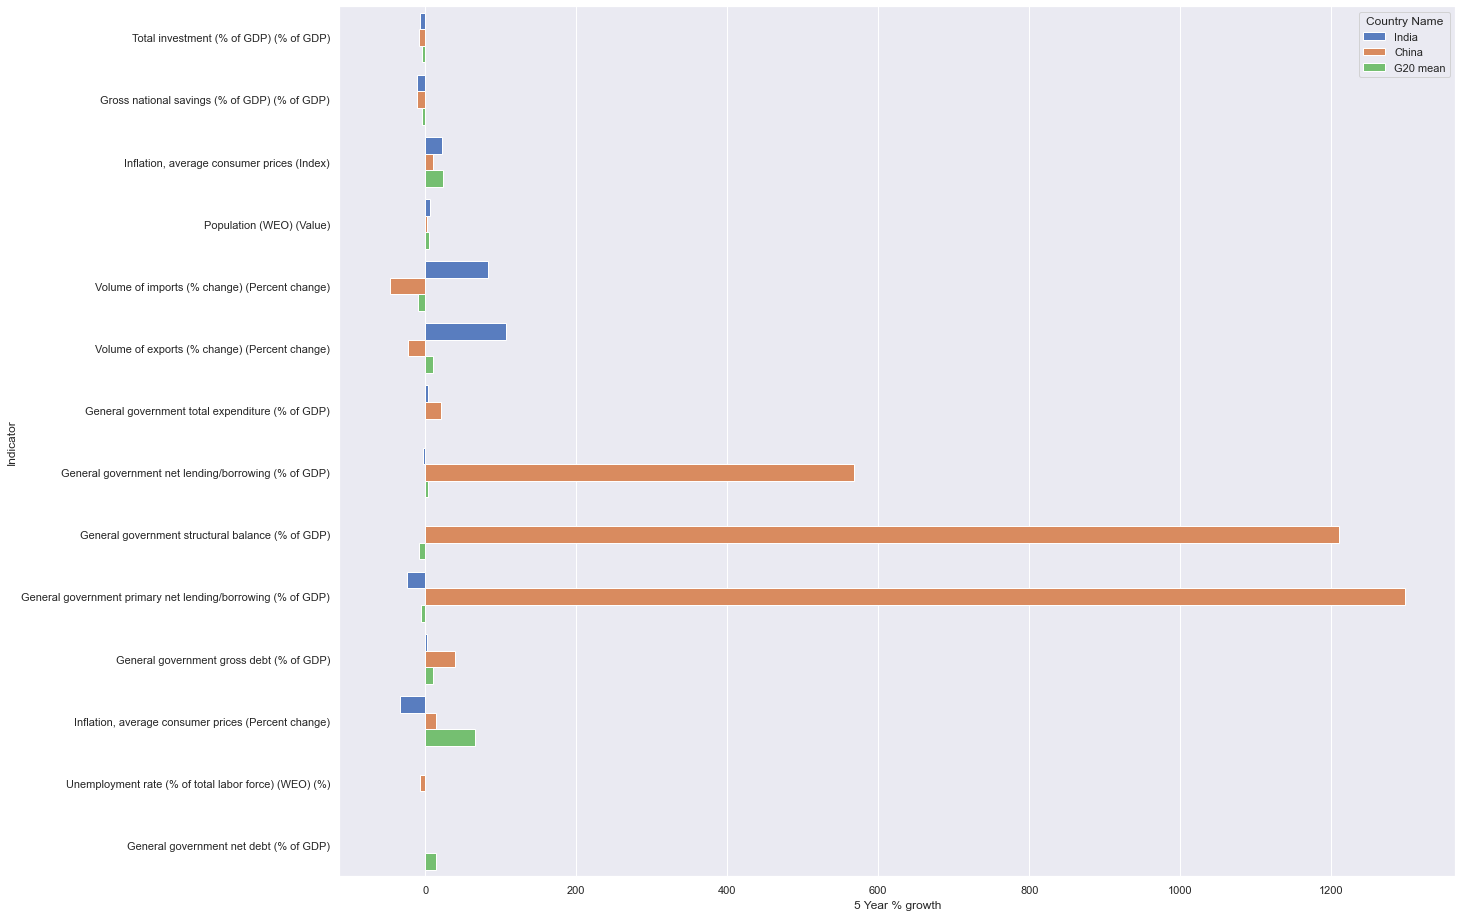

In [185]:
fig = plt.figure(figsize=(20,16))
chart=sns.barplot(x='5 Year % growth', y='Indicator', hue = 'Country Name', data = df_merged_g20, ci=None)

This really accentuates the magnitude of the net borrowing/lending and structural balance growth in China compared to India and the G20

## Investigating past trends and future projection

In [186]:
#create variables for the selected time periods to be interrogated 

five_year = list(range(2015,2020))
twenty_year = list(range(2000,2020))
full_period = list(range(1980,2020))
projection = list(range(2020,2025))

#list of economic indicators to use in for loop
econ_indicators = df_india['Indicator'].tolist()
econ_indicators

['Total investment (% of GDP) (% of GDP)',
 'Gross national savings (% of GDP) (% of GDP)',
 'Inflation, average consumer prices (Index)',
 'Population (WEO) (Value)',
 'Volume of imports (% change) (Percent change)',
 'Volume of exports (% change) (Percent change)',
 'General government total expenditure (% of GDP)',
 'General government net lending/borrowing (% of GDP)',
 'General government structural balance (% of GDP)',
 'General government primary net lending/borrowing (% of GDP)',
 'General government gross debt (% of GDP)',
 'Inflation, average consumer prices (Percent change)']

In [187]:
#reshape into 'long' format 
df_merged_g20_melt = pd.melt(df_merged_g20, id_vars = ['Country Name', 'Indicator', 'Subindicator Type'], var_name = 'Year', value_name = 'Value')
df_merged_g20_melt

,Country Name,Indicator,Subindicator Type,Year,Value
0,India,Total investment (% of GDP) (% of GDP),% of GDP,1980,1.916900e+01
1,India,Gross national savings (% of GDP) (% of GDP),% of GDP,1980,1.587400e+01
2,India,"Inflation, average consumer prices (Index)",Index,1980,8.960000e+00
3,India,Population (WEO) (Value),Value,1980,6.855000e+08
4,India,Volume of imports (% change) (Percent change),Percent change,1980,1.335500e+01
...,...,...,...,...,...
1789,G20 mean,Population (WEO) (Value),NaN,5 Year % growth,4.339015e+00
1790,G20 mean,Total investment (% of GDP) (% of GDP),NaN,5 Year % growth,-4.701696e+00
1791,G20 mean,Unemployment rate (% of total labor force) (WE...,NaN,5 Year % growth,-3.676998e-01
1792,G20 mean,Volume of exports (% change) (Percent change),NaN,5 Year % growth,1.040332e+01


In [188]:
#drop residual ''% growth' entries on data frame from last section 
index_to_drop = df_merged_g20_melt[df_merged_g20_melt['Year'] == '5 Year % growth'].index
df_merged_g20_melt = df_merged_g20_melt.drop(index_to_drop)

#Year column entries need to changed from object to int32 type - required for slicing
df_merged_g20_melt['Year'] = df_merged_g20_melt['Year'].astype(int) 
df_merged_g20_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 1754
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       1755 non-null   object 
 1   Indicator          1755 non-null   object 
 2   Subindicator Type  1125 non-null   object 
 3   Year               1755 non-null   int32  
 4   Value              1623 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 75.4+ KB


## Display a key to be used for selecting indicator

In [191]:
#key for plotter function below...
print('Use this key to select indicator in below function:')
df_merged_g20_melt['Indicator'].head(18) # After the first 18 rows the indicators repeat


Use this key to select indicator in below function:


0                Total investment (% of GDP) (% of GDP)
1          Gross national savings (% of GDP) (% of GDP)
2            Inflation, average consumer prices (Index)
3                              Population (WEO) (Value)
4         Volume of imports (% change) (Percent change)
5         Volume of exports (% change) (Percent change)
6       General government total expenditure (% of GDP)
7     General government net lending/borrowing (% of...
8      General government structural balance (% of GDP)
9     General government primary net lending/borrowi...
10             General government gross debt (% of GDP)
11    Inflation, average consumer prices (Percent ch...
12               Total investment (% of GDP) (% of GDP)
13         Gross national savings (% of GDP) (% of GDP)
14           Inflation, average consumer prices (Index)
15                             Population (WEO) (Value)
16        Volume of imports (% change) (Percent change)
17        Volume of exports (% change) (Percent 

## Creation of functions: Extract selected indicator values

In [192]:
def twenty_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                                  & (df_merged_g20_melt['Year'].isin(twenty_year))]
    

    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)

    chart.set_title(econ_indicators[n])
    plt.show()

def five_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                                  & (df_merged_g20_melt['Year'].isin(five_year))]
    
    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)
    chart.set_title(econ_indicators[n])
    plt.show()
    
def forty_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                              & (df_merged_g20_melt['Year'].isin(full_period))]

    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)
    chart.set_title(econ_indicators[n])
    plt.show()
    
def all_ranges(n):
    
    five_year_plotter(n)
    twenty_year_plotter(n)
    full_range_plotter(n)

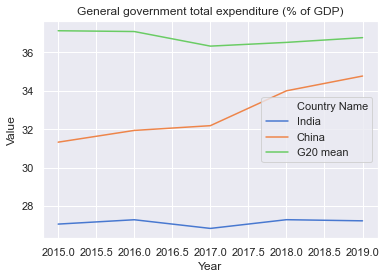

In [193]:
five_year_plotter(6)

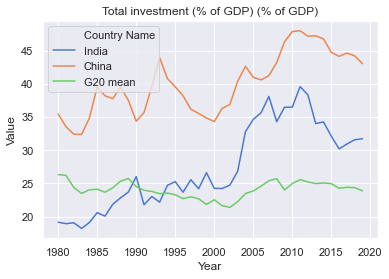

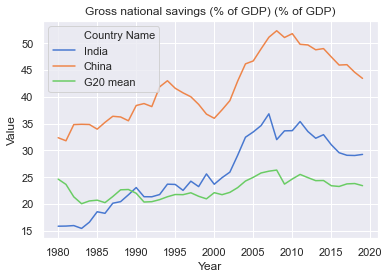

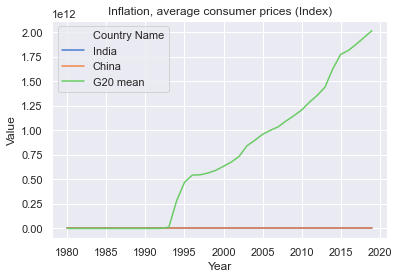

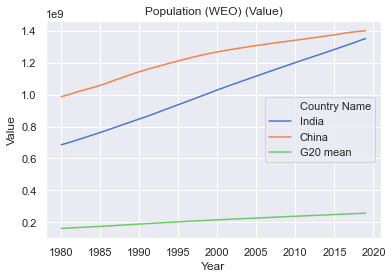

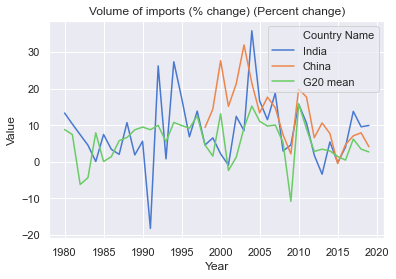

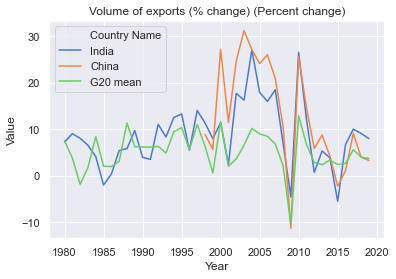

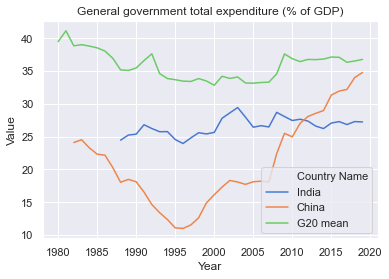

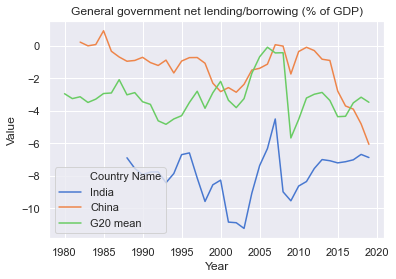

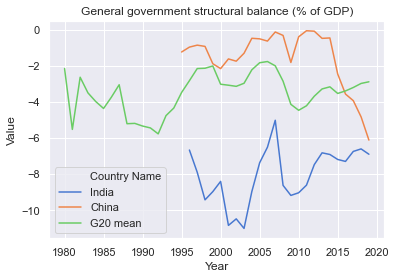

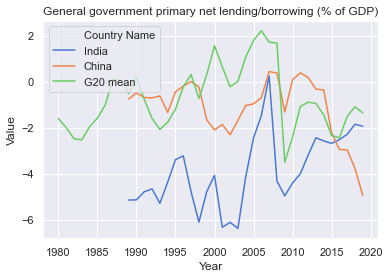

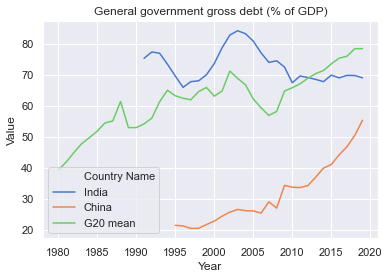

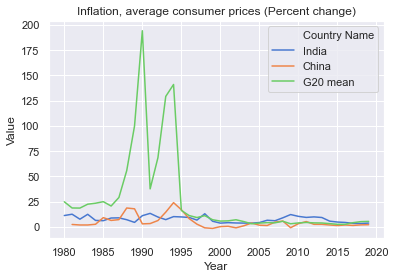

IndexError: list index out of range

In [194]:
for n in range (0,18):
    forty_year_plotter(n)